# **Welcome to the Confifi special COVID-19 notebook!**

**Our goal for this project is to study the impact of big crises such as COVID on the risk assessments methods used in finance. We will focus more specifically on the prediction of [VaR](https://www.investopedia.com/terms/v/var.asp) using [Random Walk Theory](https://www.investopedia.com/terms/r/randomwalktheory.asp) and [Montecarlo Simulation](https://www.investopedia.com/terms/m/montecarlosimulation.asp).
We focus on the evolution of the S&P500 stock index.**

In [0]:
import numpy
import time
import scipy.stats
import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from pandas import DataFrame
%matplotlib inline
%config InlineBackend.figure_formats=['png']

**We start by plotting the evolution of the S&P500 stock index in 2019 and during the covid crash. 
_Source : Yahoo Finance_** 

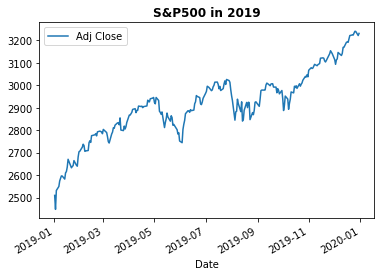

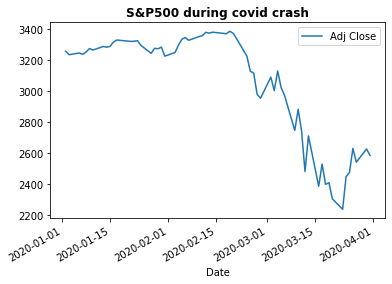

In [0]:
#we start by plotting S&P500 in 2019 and during the covid crash

start = datetime.datetime(2019, 1, 1)
end20 = datetime.datetime(2020, 1, 1)
endcovid = datetime.datetime(2020, 3, 31)
SNP19 = web.DataReader("^GSPC", "yahoo", start, end20)
SNP19.plot(y="Adj Close")
plt.title(u"S&P500 in 2019", weight = 'bold');

SNPcov = web.DataReader("^GSPC", "yahoo", end20, endcovid)
SNPcov.plot(y="Adj Close")
plt.title(u"S&P500 during covid crash", weight = 'bold');

**Then we plot S&P500 daily returns to show the surge in volatility during the covid crash**

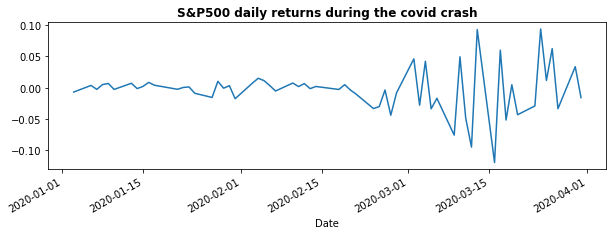

In [0]:
#plotting S&P500 daily returns shows the extreme surge in volatility during the crash
#this demonstrates the abnormality of stock fluctuations during the crash 
fig = plt.figure()
fig.set_size_inches(10,3)
SNPcov["Adj Close"].pct_change().plot()
plt.title(u"S&P500 daily returns during the covid crash", weight = 'bold');

**Here, we graph histograms of S&P500 daily returns in 2019 and during the covid crash. There is a notable difference between both normal curves.**


pct change covid
mean -0.0031387064581521467
std 0.03584522609684447
var 0.0012848802339339

absolute covid
mean 3055.8691839402723
std 345.0969418601111
var 119091.89928120088

absolute 2019
mean 2913.3563804020955
std 150.36906523364075
var 22610.85577923891


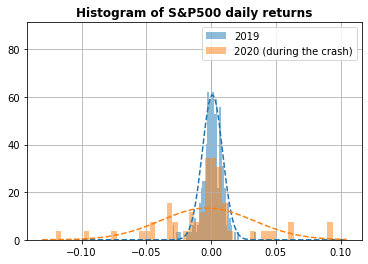

In [144]:
SNP19["Adj Close"].pct_change().hist(bins=50, density = True, histtype= 'stepfilled', alpha=0.5, label="2019")
plt.title(u"Histogram of S&P500 daily returns", weight='bold')
# SNP19["Adj Close"].pct_change().std()

SNPcov["Adj Close"].pct_change().hist(bins=50, density = True, histtype= 'stepfilled', alpha=0.5, label="2020 (during the crash)")
plt.title(u"Histogram of S&P500 daily returns", weight='bold')
# SNPcov["Adj Close"].pct_change().std()

legend = plt.legend(prop={'size': 10})

mean_2019_n = numpy.mean(SNP19["Adj Close"].pct_change())
mean_covid_n = numpy.mean(SNPcov["Adj Close"].pct_change())
mean_2019 = numpy.mean(SNP19["Adj Close"])
mean_covid = numpy.mean(SNPcov["Adj Close"])

sig_2019_n = numpy.std(SNP19["Adj Close"].pct_change())
sig_covid_n = numpy.std(SNPcov["Adj Close"].pct_change())
sig_2019 = numpy.std(SNP19["Adj Close"])
sig_covid = numpy.std(SNPcov["Adj Close"])

mn, mx = plt.xlim()
x = numpy.linspace(mn, mx, 200)

norm_2019 = scipy.stats.norm(loc=mean_2019_n, scale=sig_2019_n)
norm_covid = scipy.stats.norm(loc=mean_covid_n, scale=sig_covid_n)

plt.plot(x, norm_2019.pdf(x) * 1.2, color='C0', ls='--')
plt.plot(x, norm_covid.pdf(x) * 1.2, color='C1', ls='--')

print('\npct change covid')
print('mean', numpy.mean(SNPcov["Adj Close"].pct_change()))
print('std',numpy.std(SNPcov["Adj Close"].pct_change()))
print('var', numpy.var(SNPcov["Adj Close"].pct_change()))

print('\nabsolute covid')
print('mean', numpy.mean(SNPcov["Adj Close"]))
print('std',numpy.std(SNPcov["Adj Close"]))
print('var', numpy.var(SNPcov["Adj Close"]))

print('\nabsolute 2019')
print('mean', numpy.mean(SNP19["Adj Close"]))
print('std',numpy.std(SNP19["Adj Close"]))
print('var', numpy.var(SNP19["Adj Close"]))

We have looked at market conditions in 2019 and during the covid crash.
We defined historic mean and variance for both of these periods. 

Now let's run these variables through a random walk.

In [0]:
#running many scenarios with random market conditions, calculating portfolio loss for each trial.
#Here we define parameters for the geometric Brownian motion

days = 90 #time horizon
dt = 1/float(days)
# sigma = sig_covid_n #volatility
# mu = mean_covid_n # 0.05 #drift (average growth rate)

In [0]:
def random_walk(startprice, sigma, mu):
    price= numpy.zeros(days)
    shock= numpy.zeros(days)
    price[0] = startprice
    for i in range(1, days):
        shock[i] = numpy.random.normal(loc=mu * dt, scale=sigma * numpy.sqrt(dt))
        price[i] = max(0, price[i-1] + shock[i] * price[i-1])
    return price

Text(0.5, 1.0, '90 Random walk with data from Covid crash ')

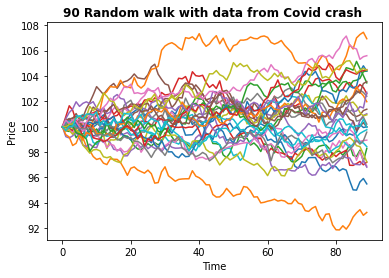

In [140]:
for run in range(30):
    plt.plot(random_walk(100, sig_covid_n, mean_covid_n))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(u"90-day random walk with data from Covid crash ", weight='bold')

Text(0.5, 1.0, '90-day random walk with data from 2019 ')

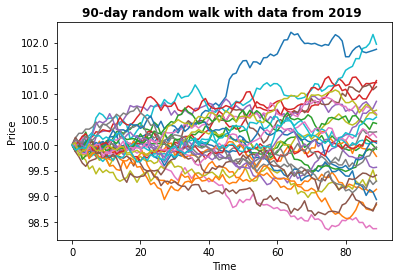

In [141]:

for run in range(30):
    plt.plot(random_walk(100, sig_2019_n, mean_2019_n))
plt.xlabel("Time")
plt.ylabel("Price")
plt.title(u"90-day random walk with data from 2019 ", weight='bold')

[0. 0. 0. ... 0. 0. 0.]
98.32936869661255 98.86717704786021


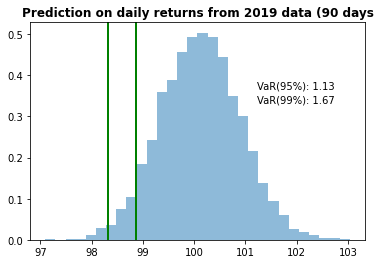

In [172]:
start_time = time.time()
runs = 10000
simulations = numpy.zeros(runs)
print(simulations)
for run in range(runs):
    simulations[run] = random_walk(100.0, sig_2019_n, mean_2019_n)[days-1]
q99 = numpy.percentile(simulations, 1)
q95 = numpy.percentile(simulations, 5)
print(q99, q95)
plt.hist(simulations, density = True, bins = 30, histtype = 'stepfilled', alpha = 0.5)
# plt.figtext(0.6, 0.8, u"Start : 100")
finalPerf = round((simulations.mean()-100), 3)
# plt.figtext(0.6, 0.7, u"Final performance : {:.3}%".format(finalPerf))
plt.figtext(0.65, 0.6, u"VaR(99%): {:.3}".format(100-q99))
plt.figtext(0.65, 0.65, u"VaR(95%): {:.3}".format(100-q95))
plt.axvline(x=q99, linewidth=2, color='g')
plt.axvline(x=q95, linewidth=2, color='g')
plt.title(u"Prediction on daily returns from 2019 data ({} days".format(days), weight='bold');

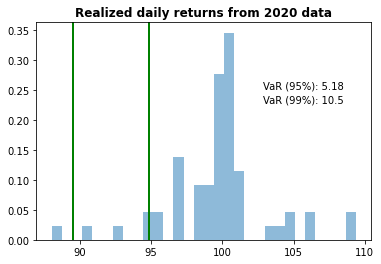

In [194]:
adjusted_covid_snp = SNPcov["Adj Close"].pct_change().dropna().apply(lambda x: 100*(x+1))
q99 = numpy.percentile(adjusted_covid_snp, 1)
q95 = numpy.percentile(adjusted_covid_snp, 5)
plt.hist(adjusted_covid_snp, density = True, bins = 30, histtype = 'stepfilled', alpha = 0.5)
plt.title(u"Realized daily returns from 2020 data", weight='bold')
plt.figtext(0.65, 0.6, u"VaR (99%): {:.3}".format(100-q99))
plt.figtext(0.65, 0.65, u"VaR (95%): {:.3}".format(100-q95))
plt.axvline(x=q99, linewidth=2, color='g')
plt.axvline(x=q95, linewidth=2, color='g')


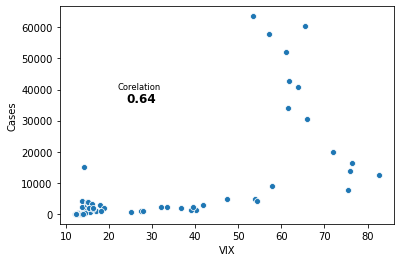

In [0]:

import json
import pandas as pd
import seaborn as sns

with open('covid_data/totals.json') as fp:
  raw_covid_data = json.load(fp)

df_data = {
    'Date': [],
    'Deaths': [],
    'Cases': [],
}
for date, info in raw_covid_data.items():
    dt = datetime.date(*[int(i) for i in date.split('-')])
    df_data['Date'].append(pd.to_datetime(dt))
    df_data['Cases'].append(info['cases'])
    df_data['Deaths'].append(info['deaths'])

covid_data = DataFrame.from_dict(df_data)

vix_and_covid = pd.merge(covid_data, VIXcov, on='Date')
vix_and_covid.dropna()
vix_and_covid.rename(columns = {'Adj Close':'VIX'}, inplace = True)

corr_plot = sns.scatterplot(data=vix_and_covid[['VIX','Cases']], x='VIX', y='Cases')
corr_plot.text(24, 36000, str(round(corr, 2)), weight='bold', size='large')
corr_plot.text(22, 40000, 'Corelation', size='small')
corr = vix_and_covid[['VIX','Cases']].corr()['Cases']['VIX']


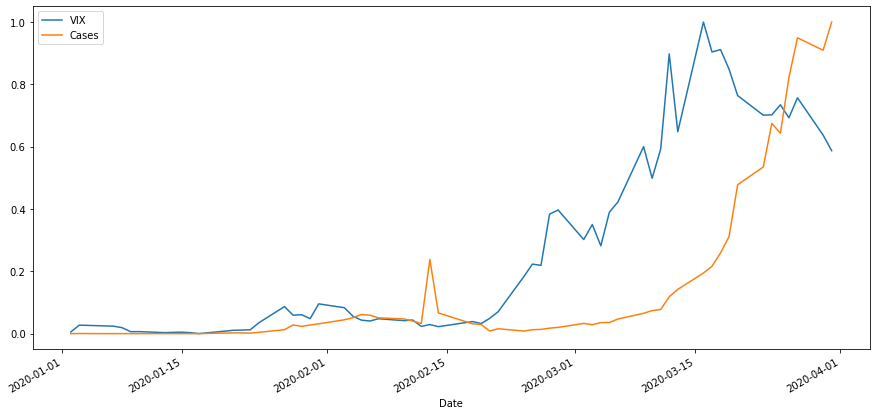

In [0]:

vix_and_covid[['VIX','Cases']] = vix_and_covid[['VIX','Cases']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
vix_and_covid[['VIX','Cases', 'Date']].set_index('Date').plot(figsize=(15,7))
